In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

## SM 2nbb distribution

In [4]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [5]:
1/np.sum(sm_2nbb_dist)

2.9979328769819916e+16

In [6]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Data Emanuele

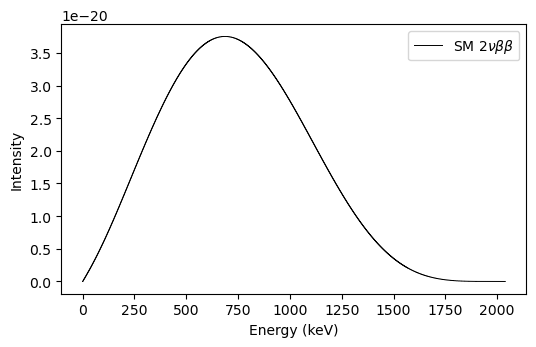

In [7]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/Tables_Emanuele/'

plt.figure(figsize=(6, 3.5))
plt.step(bins, sm_2nbb_dist, c='k', lw=0.7, ls='-',label=r'SM 2$\nu\beta\beta$')
plt.xlabel('Energy (keV)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

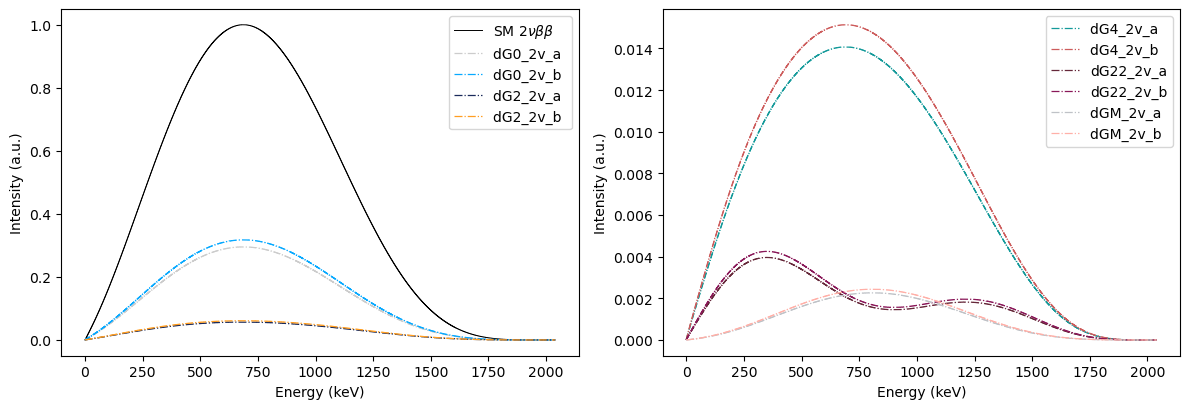

In [8]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/Tables_Emanuele/'

dG0_2v_a  = np.loadtxt(data_path + 'dG0_2ν_a.dat',  usecols=(1), unpack=True)
dG0_2v_b  = np.loadtxt(data_path + 'dG0_2ν_b.dat',  usecols=(1), unpack=True)
dG2_2v_a  = np.loadtxt(data_path + 'dG2_2ν_a.dat',  usecols=(1), unpack=True)
dG2_2v_b  = np.loadtxt(data_path + 'dG2_2ν_b.dat',  usecols=(1), unpack=True)
dG4_2v_a  = np.loadtxt(data_path + 'dG4_2ν_a.dat',  usecols=(1), unpack=True)
dG4_2v_b  = np.loadtxt(data_path + 'dG4_2ν_b.dat',  usecols=(1), unpack=True)
dG22_2v_a = np.loadtxt(data_path + 'dG22_2ν_a.dat', usecols=(1), unpack=True)
dG22_2v_b = np.loadtxt(data_path + 'dG22_2ν_b.dat', usecols=(1), unpack=True)
dGM_2v_a  = np.loadtxt(data_path + 'dGM_2ν_a.dat',  usecols=(1), unpack=True)
dGM_2v_b  = np.loadtxt(data_path + 'dGM_2ν_b.dat',  usecols=(1), unpack=True)


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4.2))
ax0.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-',label=r'SM 2$\nu\beta\beta$')
ax0.step(bins, dG0_2v_a , c=cols[0], lw=0.9, ls='-.', label='dG0_2v_a ')
ax0.step(bins, dG0_2v_b , c=cols[1], lw=0.9, ls='-.', label='dG0_2v_b ')
ax0.step(bins, dG2_2v_a , c=cols[2], lw=0.9, ls='-.', label='dG2_2v_a ')
ax0.step(bins, dG2_2v_b , c=cols[3], lw=0.9, ls='-.', label='dG2_2v_b ')
ax1.step(bins, dG4_2v_a , c=cols[4], lw=0.9, ls='-.', label='dG4_2v_a ')
ax1.step(bins, dG4_2v_b , c=cols[5], lw=0.9, ls='-.', label='dG4_2v_b ')
ax1.step(bins, dG22_2v_a, c=cols[6], lw=0.9, ls='-.', label='dG22_2v_a')
ax1.step(bins, dG22_2v_b, c=cols[7], lw=0.9, ls='-.', label='dG22_2v_b')
ax1.step(bins, dGM_2v_a , c=cols[8], lw=0.9, ls='-.', label='dGM_2v_a ')
ax1.step(bins, dGM_2v_b , c=cols[9], lw=0.9, ls='-.', label='dGM_2v_b ')
ax0.set_xlabel('Energy (keV)')
ax0.set_ylabel('Intensity (a.u.)')
ax1.set_xlabel('Energy (keV)')
ax1.set_ylabel('Intensity (a.u.)')
ax0.legend()
ax1.legend()
#plt.suptitle('Weak magnetism processes')
plt.tight_layout()
#fig.savefig('./images/standard_majoron_spectra.pdf', bbox_inches = 'tight')
plt.show()

## Try normalizing

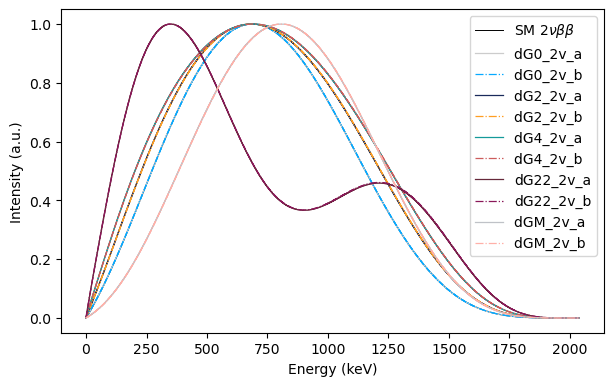

In [9]:
fig, ax = plt.subplots(figsize=(7, 4.2))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-',label=r'SM 2$\nu\beta\beta$')
ax.step(bins, dG0_2v_a/np.max(dG0_2v_a) ,  c=cols[0], lw=0.9, ls='-',  label='dG0_2v_a ')
ax.step(bins, dG0_2v_b/np.max(dG0_2v_b) ,  c=cols[1], lw=0.9, ls='-.', label='dG0_2v_b ')
ax.step(bins, dG2_2v_a/np.max(dG2_2v_a) ,  c=cols[2], lw=0.9, ls='-',  label='dG2_2v_a ')
ax.step(bins, dG2_2v_b/np.max(dG2_2v_b) ,  c=cols[3], lw=0.9, ls='-.', label='dG2_2v_b ')
ax.step(bins, dG4_2v_a/np.max(dG4_2v_a) ,  c=cols[4], lw=0.9, ls='-',  label='dG4_2v_a ')
ax.step(bins, dG4_2v_b/np.max(dG4_2v_b) ,  c=cols[5], lw=0.9, ls='-.', label='dG4_2v_b ')
ax.step(bins, dG22_2v_a/np.max(dG22_2v_a), c=cols[6], lw=0.9, ls='-',  label='dG22_2v_a')
ax.step(bins, dG22_2v_b/np.max(dG22_2v_b), c=cols[7], lw=0.9, ls='-.', label='dG22_2v_b')
ax.step(bins, dGM_2v_a/np.max(dGM_2v_a) ,  c=cols[8], lw=0.9, ls='-',  label='dGM_2v_a ')
ax.step(bins, dGM_2v_b/np.max(dGM_2v_b) ,  c=cols[9], lw=0.9, ls='-.', label='dGM_2v_b ')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
#fig.savefig('./images/standard_majoron_spectra.pdf', bbox_inches = 'tight')
plt.show()

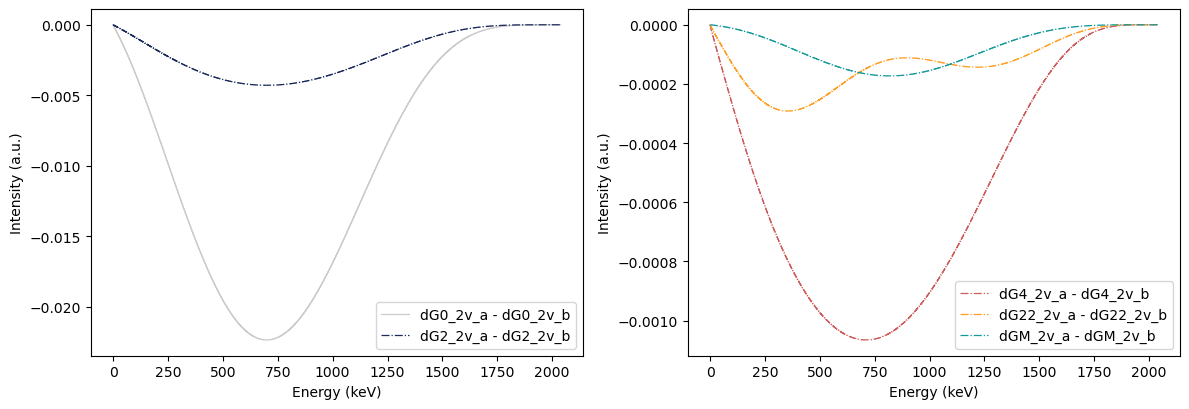

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4.2))
ax0.step(bins, dG0_2v_a-dG0_2v_b,   c=cols[0], lw=0.9, ls='-',  label='dG0_2v_a - dG0_2v_b')
ax0.step(bins, dG2_2v_a-dG2_2v_b,   c=cols[2], lw=0.9, ls='-.', label='dG2_2v_a - dG2_2v_b')
ax1.step(bins, dG4_2v_a-dG4_2v_b,   c=cols[5], lw=0.9, ls='-.', label='dG4_2v_a - dG4_2v_b')
ax1.step(bins, dG22_2v_a - dG22_2v_b, c=cols[3], lw=0.9, ls='-.', label='dG22_2v_a - dG22_2v_b')
ax1.step(bins, dGM_2v_a - dGM_2v_b,   c=cols[4], lw=0.9, ls='-.', label='dGM_2v_a - dGM_2v_b ')
ax0.set_xlabel('Energy (keV)')
ax0.set_ylabel('Intensity (a.u.)')
ax0.legend()
ax1.set_xlabel('Energy (keV)')
ax1.set_ylabel('Intensity (a.u.)')
ax1.legend()
plt.tight_layout()
#fig.savefig('./images/standard_majoron_spectra.pdf', bbox_inches = 'tight')
plt.show()

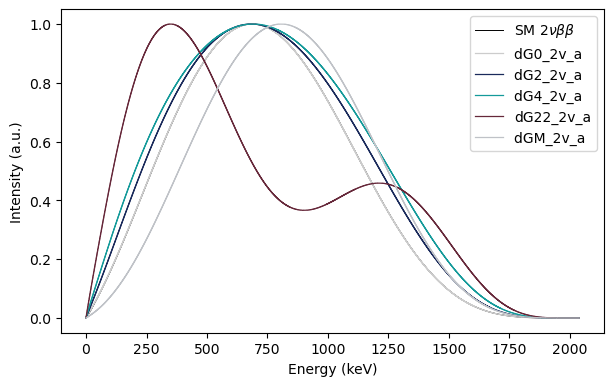

In [11]:
fig, ax = plt.subplots(figsize=(7, 4.2))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-',label=r'SM 2$\nu\beta\beta$')
ax.step(bins, dG0_2v_a/np.max(dG0_2v_a) ,  c=cols[0], lw=0.9, ls='-',  label='dG0_2v_a ')
ax.step(bins, dG2_2v_a/np.max(dG2_2v_a) ,  c=cols[2], lw=0.9, ls='-',  label='dG2_2v_a ')
ax.step(bins, dG4_2v_a/np.max(dG4_2v_a) ,  c=cols[4], lw=0.9, ls='-',  label='dG4_2v_a ')
ax.step(bins, dG22_2v_a/np.max(dG22_2v_a), c=cols[6], lw=0.9, ls='-',  label='dG22_2v_a')
ax.step(bins, dGM_2v_a/np.max(dGM_2v_a) ,  c=cols[8], lw=0.9, ls='-',  label='dGM_2v_a ')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [12]:
def diff_decay_rate_low_order(xi_31):
    return dG0_2v_a + dG2_2v_a * xi_31

diff_decay_rate_low_order(2)

array([0.00000000e+00, 5.70620652e-04, 1.24499227e-03, ...,
       1.05943800e-13, 3.31775034e-15, 0.00000000e+00])

## Start sensitivity calculation

In [13]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

bckg_model = (total_model - vvBB_model)

In [14]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 30
max_bin = 2010

# explain?
eff = 0.75

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

exposure = L200_data_exposure

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

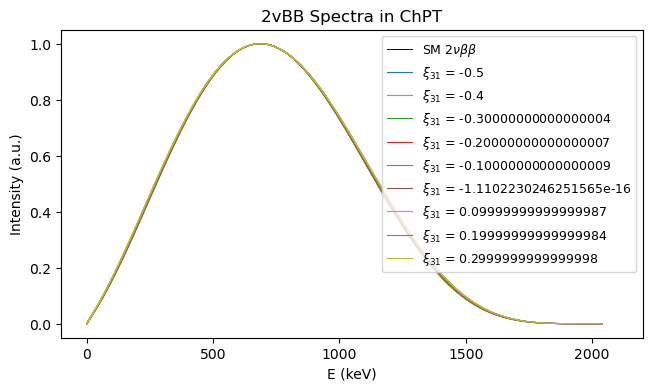

In [15]:
xi31_values     = np.arange(-0.5, 0.4, 0.1)
def_signal_dist = []

for idx, xi31_v in enumerate(xi31_values):
    sdist = diff_decay_rate_low_order(xi31_v)
    #sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    def_signal_dist.append(sdist)
    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, xi31_v in zip(def_signal_dist, xi31_values):
    ax.step(bins, sdist/np.max(sdist), label=r'$\xi_{31}$ = ' + str(xi31_v), lw=0.8)

ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('2vBB Spectra in ChPT')
ax.legend(fontsize=9)
plt.show()

In [16]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

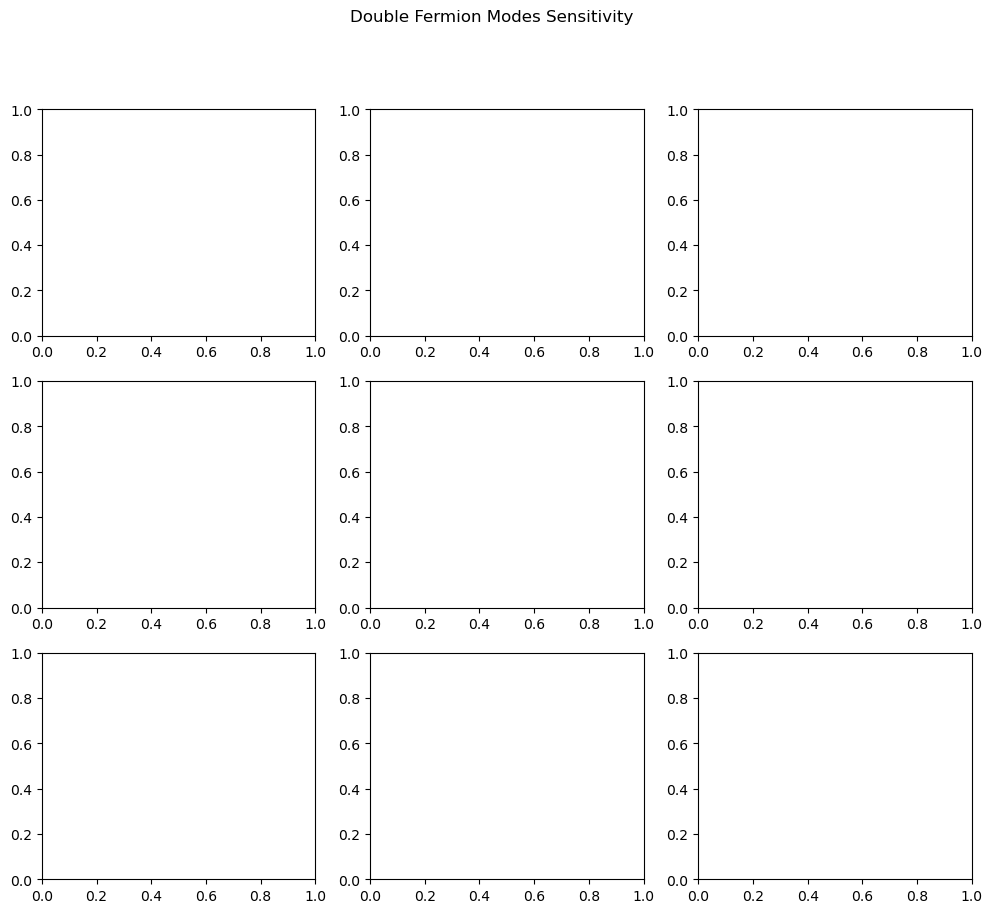

In [37]:
labels       = ['xi31_'         + str(xi31_val) for xi31_val in xi31_values]
#labels_fancy = [r'm$_{\chi}$ = ' + str(fmass_keV) + ' keV' for fmass_keV in light_fermion_masses_keV]
labels_fancy = labels
n_max_list   = [130000 for i in xi31_values]#, 40000, 30000, 20000, 10000, 10000, 10000, 15000, 60000]
n_min_list   = [6      for i in range(len(n_max_list))]


# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')
half_life_sens_xi31 = []
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_min, n_max) in enumerate(zip(labels, labels_fancy, xi31_values, def_signal_dist, n_min_list, n_max_list)):
    # First check that the endpoint is in the fit range
    #if 2039 - 2 * fmass_keV < min_bin:
    #    continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens
    half_life_sens_xi31.append(half_life_sens)

    #all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    ### fig, ax = plt.subplots()
    ### ax_to_plot = [ax, combined_ax[idx]]
    ### for ax in ax_to_plot:
    ###     ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
    ###     ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
    ###     ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
    ###     ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
    ###     ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
    ###     set_border_line_width(ax, 1.5)
    ###     ax.set_title(lab_fancy + ' Sensitivity')
    ###     ax.set_xlabel(r'T$_{1/2}$ (yr)')
    ###     ax.set_ylabel('p-value')
    ###     ax.set_xlim(min(half_life), max(half_life))
    ###     ax.set_xscale('log')
    ###     ax.set_yscale('log')
    ###     ax.legend(loc='lower right')
    ###     ax.grid()
    ### #fig.savefig('./images/doubleF_' + lab + '.pdf', bbox_inches='tight')
    ### plt.close(fig)

### combined_fig.tight_layout()
### #combined_fig.savefig('./images/doubleF_combined.pdf', bbox_inches='tight')
### plt.show()

In [38]:
half_life_sens_xi31

[6.464579131261341e+21,
 6.530130905622096e+21,
 6.770157350308252e+21,
 7.145374633537694e+21,
 7.618163765896718e+21,
 8.157216826408454e+21,
 8.738574775485951e+21,
 9.344761703318802e+21,
 9.963359379053867e+21]